Assuming that the stock prices follow the geometric brownian motion

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import minimize

Now we have to optimize mu, sigma such that the product of probability is max.

This happens when the sum of ((x(t)-Y)/X.t)^2 becomes min

x(t) = s(t+1) - s(t)
Y = (mu - sigma**2/2)
X = sigma

PART-1
let's get the data

In [8]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


(0,)


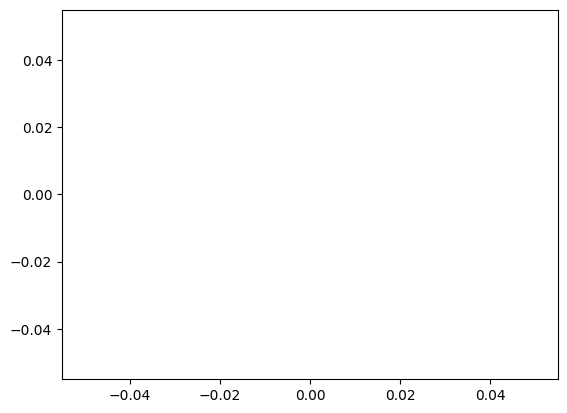

In [9]:
ticker = "AAPL"
data = yf.download(ticker, period="1mo", interval = "1h")
a = data.to_numpy()
a = a.T[3] #Gets the close price
print(a.shape)

plt.plot(a.T)

Function of 

In [6]:
#Our GBM predicts the e^x so we have to apply log to get to the normal values
n_entries = a.shape[0]
b = np.zeros([n_entries])
for i in range(139):
    b[i] = np.log(a[i+1]/a[i])
    
#Initializing the time scale
T = n_entries
dt = 1
t = np.linspace(dt , T, n_entries)

#Initializing the coeeficients
s0 = 0
s1 = 0
s2 = 0

#Finding the cooefficients
for i in range(n_entries):
    # co-efficient of Y^2
    s0 += (1/t[i])
    s2 += np.power(b[i],2)/t[i]
    s1 += b[i]/t[i]

s1 = -2 * s1
print(s0,s1,s2)


IndexError: index 1 is out of bounds for axis 0 with size 0

Our Equation is $z = \frac{s_0x^2 + s_1x + s_2}{x + y/2}$

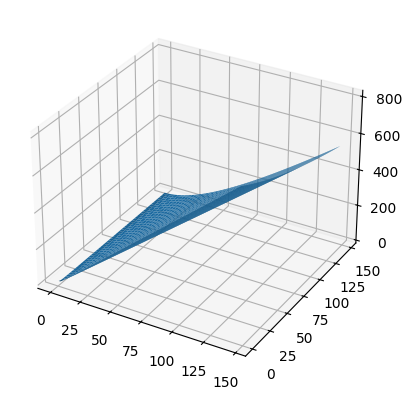

In [25]:
#Let's print/ Graph the model of the equation
def f(X):
    x,y = X
    return (s0 * (x**2) + s1 * (x) + s0)/(x+(y/2))

ax = plt.axes(projection="3d")

x = np.linspace(0, n_entries, n_entries)
y = np.linspace(1, n_entries, n_entries)
z = f((x,y))

X , Y = np.meshgrid(x,y)
Z = f((X,Y))


ax.plot_surface(X, Y, Z)

In [9]:
#optimizing the function
x0 = np.array([0,1])

result = minimize(f, x0, method='BFGS')

print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.00012048175937683886
        x: [ 2.303e-02  9.254e+04]
      nit: 53
      jac: [ 5.956e-06 -1.302e-09]
 hess_inv: [[ 7.053e+02 -5.236e+07]
            [-5.236e+07  7.761e+12]]
     nfev: 162
     njev: 54
